# Recall Machine Learning Classification models

At the end of this Lesson the studen will remember the main steps to train a model:

 - The similarities and differences between Predictive and Classification models
 - Precision and accuracy methods for model evaluation
 - Decision Trees
 - Logistic Regression
 - Random Forests
 
**You have Questions to answer in the middle of the notebook, also a recapitulation at the end**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from tabulate import tabulate

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Similarities and differences between Predictive and Classification models

Similarities, both methodologies: 

 - Are types of machine learning models used for making predictions based on data
 - Have one or more independent variables and one dependent variable, so they are supervised learning
 - Require data cleaning and feature engineering
 - Independent variables can be categorical or continuous
 - Categorical variables must be dummy
 - They are trained using a train dataset and validated through a test dataset
 - Continuous features must be standardized
 
 
Differences:

 - Type of prediction task. Predictive models aim to predict a continuous numerical dependent variable, while classification models focus on assigning data points to discrete categories or classes.
 - Accuracy metrics. Predictive models reduce distances between prediction and actual values. Classification models measures how many instances are well or wrongly classified




## Confusion matrix

https://www.youtube.com/watch?v=Kdsp6soqA7o

A confusion matrix is a table used in machine learning to evaluate the performance of a classification model. It summarizes the number of true positive, true negative, false positive, and false negative predictions, providing insight into the model's accuracy, precision, recall, and F1-score.

In [5]:
print(tabulate([['TN',  'FP'],[ 'FN',  'TP']],headers = ['pred -','pred +'], showindex = ['real -','real +'], tablefmt = 'fancy_grid'))


╒════════╤══════════╤══════════╕
│        │ pred -   │ pred +   │
╞════════╪══════════╪══════════╡
│ real - │ TN       │ FP       │
├────────┼──────────┼──────────┤
│ real + │ FN       │ TP       │
╘════════╧══════════╧══════════╛


## Classification model accuracy measures

https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5#:~:text=A%20confusion%20matrix%20is%20a%20tabular%20summary%20of,performance%20metrics%20like%20accuracy%2C%20precision%2C%20recall%2C%20and%20F1-score.

### Accuracy

Accuracy is a performance metric used in machine learning to measure the proportion of correctly predicted instances out of the total instances in a dataset. It is calculated as the ratio of true predictions (both true positives and true negatives) to the total number of predictions. Accuracy provides a general sense of a model's correctness but may not be sufficient for imbalanced datasets or when specific types of errors are more critical.

$$ TP + TN $$ $$ ------ $$ $$ TP + FP + TN + FN $$


### Precision

Measures the proportion of true positive predictions (correct positive predictions) out of all positive predictions made by a model. It quantifies the model's ability to make accurate positive predictions and is often used in conjunction with recall to evaluate a model's performance, especially in binary classification problems.

- From all of the individuals classified as Positive, How many of them really were?


$$ TP $$ $$ ------ $$ $$ TP + FP $$

This indicator is specially important to optimize when we want to maximize the prediction of one of the classes, without regarding the other (or others). For example in spam email classification 


### Recall

Recall, also known as sensitivity or true positive rate, is a performance metric in machine learning that measures the proportion of true positive predictions (correctly identified positive cases) out of all actual positive instances in a dataset. It assesses a model's ability to capture and identify all relevant positive cases and is particularly important in scenarios where missing positive instances can have significant consequences, such as medical diagnosis or fraud detection.

- From all the positive individuals, How many of them were correctly classified?


$$ TP $$ $$ ------ $$ $$ TP + FN $$




### F-Score

The F-Score, also known as the F1-Score, is a performance metric in machine learning that combines precision and recall into a single value. It is calculated as the harmonic mean of precision and recall and is used to provide a balanced assessment of a model's performance, especially in situations where there is an uneven class distribution or when both false positives and false negatives are important. The F1-Score is particularly useful when optimizing a model for both precision and recall simultaneously.


$$ 2 * (Precision * Recall) $$ $$ ------ $$ $$ (Precision + Recall) $$



## Decision Trees


A decision tree is a supervised machine learning algorithm that uses a tree-like structure to make decisions or predictions based on input features. It recursively splits the data into subsets based on the most significant feature at each node, ultimately leading to a decision or outcome. It's used for classification and regression tasks and is easy to visualize and interpret.


In [6]:
stroke = pd.read_csv('Stroke.txt', sep = ';')
stroke.head()

,Id,Blood Pressure,Obesity,Sex,Stroke
0,1,H,Y,M,N
1,2,L,Y,M,Y
2,3,H,N,F,Y
3,4,N,Y,F,Y
4,5,H,Y,F,Y


We need to encode the values to numerical to don't have errors when running the code

In [7]:
blood={'H': 2, 'N': 1, 'L': 0}  
obesity={'Y': 1, 'N': 0}  
sex={'M': 1, 'F': 0}  
stroke_attack={'Y': 1, 'N': 0} 

def encode(dic, x):   
    return dic[x]    

stroke['Blood2']=stroke['Blood Pressure'].apply(lambda x: blood[x])
stroke['obesity2']=stroke['Obesity'].apply(lambda x: obesity[x])
stroke['sex2']=stroke['Sex'].apply(lambda x: sex[x])
stroke['stroke_attack']=stroke['Stroke'].apply(lambda x: stroke_attack[x])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(stroke[['Blood2','obesity2','sex2']], 
                                                    stroke['stroke_attack'], train_size = 0.8, random_state = 0)


In [9]:
classifier_DT = tree.DecisionTreeClassifier(max_depth = 3)
classifier_DT = classifier_DT.fit(X_train, y_train)
classifier_DT.feature_importances_

array([0.68510434, 0.30753542, 0.00736024])

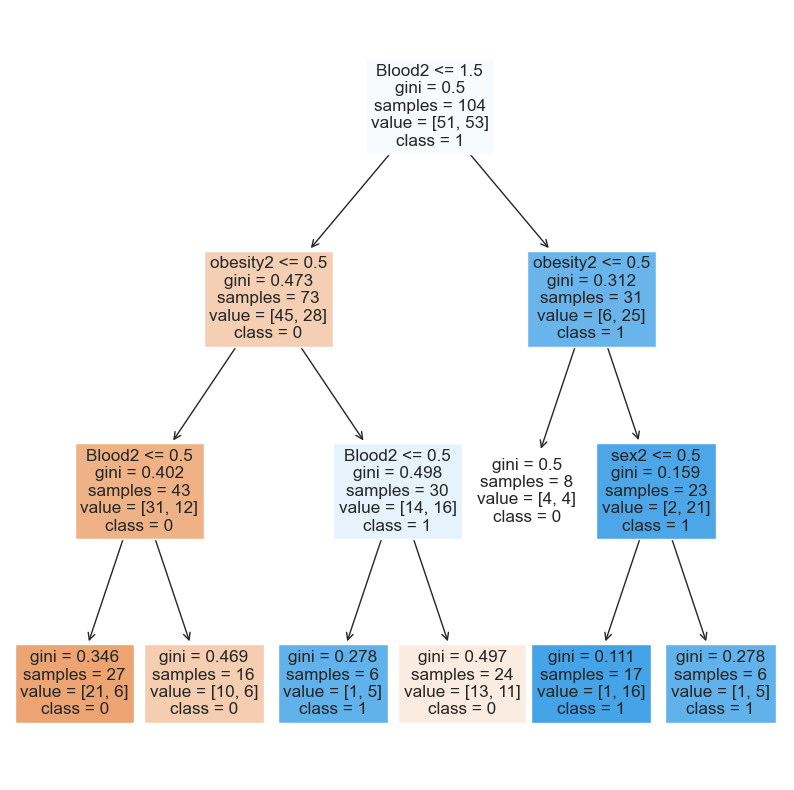

In [11]:
class_names = np.unique(y_test).astype(str).tolist()

# Now, you can use class_names in the plot_tree function
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(classifier_DT,
                    feature_names=['Blood2', 'obesity2', 'sex2'],
                    class_names=class_names,
                    filled=True)

## Decision tree Questions

 - In each square there are several indicators
   - We want Gini to be high or low?
     Low

   - What does mean value? Each of the numbers in those lists?
     The number of individuals in each class

   - Why some squares have class = 0 and others class = 1? It depends on what?
      On if the individual will have a heart stroke or not

 - If I am a thin man with high blood preasure, Will I have a heart stroke?
    Yes

## Random Forest

Random Forest is an ensemble machine learning algorithm that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It works by creating a multitude of decision trees during training and aggregating their predictions to make more robust and accurate predictions. It's widely used for classification and regression tasks and is known for its effectiveness, versatility, and resistance to overfitting.






The Random Forest algorithm, as its name suggests, uses a set of trees to classify observations.

The idea is to generate multiple trees (multiple models). But when we have a new individual to classify, which tree do we use? What is the correct classification?

The new individual will be passed through all the trees that make up the forest. Each tree will provide a verdict and classify this new observation as class 1 or 0. Then, a vote will be taken, and the class chosen by the majority of the trees in the ensemble will be the final decision of the algorithm.

A random set of observations will be selected to train each of the trees of the forest, with replacement. This means that some observations may appear multiple times, while others may not appear at all in the training set. This is done to increase the training dataset's diversity.

Since each tree is trained with a different training dataset, different variables/features will be selected as the most significant to be part of each of the trees (Feature Bagging).


https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

https://www.quantstart.com/articles/bootstrap-aggregation-random-forests-and-boosted-trees/

https://immune.institute/blog/metodos-de-bagging-y-de-boosting-diferencia/

In [12]:
dolphins = pd.read_csv('Dolphnis.txt', sep = ';')

In [13]:
Gills={'Y': 1, 'N': 0}  
Beak={'Y': 1, 'N': 0}  
Teeth={'M': 1, 'F': 0}  
Dolphin={'Y': 1, 'N': 0} 

def encode(dic, x):   
    return dic[x]    

dolphins['Gills2']=dolphins['Gills'].apply(lambda x: Gills[x])
dolphins['Beak2']=dolphins['Beak'].apply(lambda x: Beak[x])
dolphins['Teeth2']=dolphins['Teeth'].apply(lambda x: Teeth[x])
dolphins['Dolphin2']=dolphins['Dolphin'].apply(lambda x: Dolphin[x])
dolphins

,Id,Length,Gills,Beak,Teeth,Dolphin,Gills2,Beak2,Teeth2,Dolphin2
0,1,3,Y,Y,F,Y,1,1,0,1
1,2,3,N,N,F,Y,0,0,0,1
2,3,3,N,N,F,Y,0,0,0,1
3,4,3,Y,Y,F,Y,1,1,0,1
4,5,3,N,Y,F,Y,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
266,267,3,Y,Y,F,Y,1,1,0,1
267,268,4,Y,N,F,Y,1,0,0,1
268,269,3,Y,Y,F,Y,1,1,0,1
269,270,4,Y,Y,F,Y,1,1,0,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(dolphins[['Gills2','Beak2','Teeth2','Length']], 
                                                    dolphins['Dolphin2'], train_size = 0.60, random_state = 0)
X_test.shape

(109, 4)

In [15]:
rf_clf = RandomForestClassifier(n_estimators = 3, criterion ='gini') #  criterion ='entropy' 
rf_clf.fit(X_train,y_train)

y_predict = rf_clf.predict(X_test)

In [16]:
print("Train set score (Accuracy) =", rf_clf.score(X_train, y_train).round(4))
print("Test set score (Accuracy) =", rf_clf.score(X_test, y_test).round(4))

conf_mat = confusion_matrix(y_test, rf_clf.predict(X_test))
print(tabulate(conf_mat,headers = ['pred Dolphin No','pred Dolphin Yes'], showindex = ['real Dolphin No','real Dolphin Yes'], tablefmt = 'fancy_grid'))

print(classification_report(y_test, rf_clf.predict(X_test)))

Train set score (Accuracy) = 0.821
Test set score (Accuracy) = 0.8165
╒══════════════════╤═══════════════════╤════════════════════╕
│                  │   pred Dolphin No │   pred Dolphin Yes │
╞══════════════════╪═══════════════════╪════════════════════╡
│ real Dolphin No  │                42 │                  8 │
├──────────────────┼───────────────────┼────────────────────┤
│ real Dolphin Yes │                12 │                 47 │
╘══════════════════╧═══════════════════╧════════════════════╛
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        50
           1       0.85      0.80      0.82        59

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.82      0.82      0.82       109



## Confussion Matrix Questions

1)Looking at the accuracy, would you confirm this model is accurate? Is it usefull for cataloguing sea animals as dolphins? Why?
    Yes, the model's accuracy of approximately 81.65% suggests reasonable performance for cataloging sea animals as dolphins, but a more comprehensive evaluation is needed to confirm its usefulness.

2)Answer True or False:

 - From all the sea animals in our dataset 88% of them were correctly classified -> False
 - 88% of the sea animals predicted as dolphins were, finally, dolphins and not other animals -> False
 - 22% of the dolphins were classified as other sea animal (No Dolphin) -> True

3)Replicate the calculation of the:

    - True Positives (TP): The number of actual dolphins correctly classified as dolphins.

    - True Negatives (TN): The number of actual non-dolphins correctly classified as non-dolphins.

    - False Positives (FP): The number of actual non-dolphins incorrectly classified as dolphins.

    - False Negatives (FN): The number of actual dolphins incorrectly classified as non-dolphins.

 - Accuracy:
        (TP + TN) / (TP + TN + FP + FN)

 - Recall of positive dolphins:
        TP / (TP + FN)

 - Precision of positive dolphins:
        TP / (TP + FP)

## Logistic Regression

It calculates the probability of an instance belonging to a particular class. Like in linear regression it estimates several coeficients to make the classifications

https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

https://datascientest.com/es/que-es-la-regresion-logistica

In [ ]:
cancer = pd.read_csv('breast_cancer.txt', sep = ';')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
diagnosis={'M': 1, 'B': 0} 

def encode(dic, x):   
    return dic[x]    

cancer['diagnosis2']=cancer['diagnosis'].apply(lambda x: diagnosis[x])

X = cancer.drop(columns=['id','diagnosis'])
X = cancer[['smoothness_mean','compactness_mean']]
y = cancer['diagnosis2']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)


In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

print(model_LR.intercept_)
print(model_LR.coef_)

[-1.15717582]
[[0.85635674 5.21828998]]


In [ ]:
print("Train set score (Accuracy) =", model_LR.score(X_train, y_train).round(4))
print("Test set score (Accuracy) =", model_LR.score(X_test, y_test).round(4))

conf_mat = confusion_matrix(y_test, model_LR.predict(X_test))
print(tabulate(conf_mat,headers = ['pred cancer No','pred cancer Yes'], showindex = ['real cancer No','real cancer Yes'], tablefmt = 'fancy_grid'))

print(classification_report(y_test, model_LR.predict(X_test)))

Train set score (Accuracy) = 0.6681
Test set score (Accuracy) = 0.6842
╒═════════════════╤══════════════════╤═══════════════════╕
│                 │   pred cancer No │   pred cancer Yes │
╞═════════════════╪══════════════════╪═══════════════════╡
│ real cancer No  │               71 │                 0 │
├─────────────────┼──────────────────┼───────────────────┤
│ real cancer Yes │               36 │                 7 │
╘═════════════════╧══════════════════╧═══════════════════╛
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        71
           1       1.00      0.16      0.28        43

    accuracy                           0.68       114
   macro avg       0.83      0.58      0.54       114
weighted avg       0.79      0.68      0.60       114



## Confussion Matrix Questions 2

- In your opinion, is this model accurate?

    While the model has a reasonable accuracy of approximately 68.42%, accuracy alone is not the only metric to consider. The low recall of positive cancer cases (16.28%) indicates that the model is missing a significant number of actual cancer cases. Therefore, the model's accuracy may not be satisfactory depending on the specific use case and the consequences of missing cancer cases.

- Every individual predicted as Cancer equal to Yes has been correctly classified? Is this realistic? Is the rest of indicators as good as the precision?

    No, not every individual predicted as "Cancer Yes" has been correctly classified. The precision for "Cancer Yes" is 100%, which means that when the model predicts someone has cancer, it is always correct. However, the recall for "Cancer Yes" is low (16.28%), indicating that the model is missing a significant number of actual cancer cases. This is not realistic, as it is not possible to have a perfect precision and recall at the same time. The rest of the indicators are not as good as the precision, as the recall for "Cancer No" is also low (68.42%).

- If not, Why? What do you would do to train a better model?

    The model is not accurate because it is missing a significant number of actual cancer cases. To train a better model, we could try to improve the recall of positive cancer cases by using a different model or by tuning the hyperparameters of the logistic regression model. We could also try to improve the model's accuracy by using a different model or by tuning the hyperparameters of the logistic regression model.


# Questions recapitulation
----------------------------------------------------------------------
## Decision tree Questions

 - In each square there are several indicators
   - We want Gini to be high or low?
   - What does mean value? Each of the numbers in those lists?
   - Why some squares have class = 0 and others class = 1? It depends on what?
   
 - If I am a thin man with high blood preasure, Will I have a heart stroke?


## Confussion Matrix Questions

1)Looking at the accuracy, would you confirm this model is accurate? Is it usefull for cataloguing sea animals as dolphins? Why?
 
2)Answer True or False:
 
 - From all the sea animals in our dataset 88% of them were correctly classified
 - 88% of the sea animals predicted as dolphins were, finally, dolphins and not other animals
 - 22% of the dolphins were classified as other sea animal (No Dolphin)
 
3)Replicate the calculation of the: 
 - Accuracy
 - Recall of positive dolphins
 - Precision of positive dolphins 
 
 
## Confussion Matrix Questions 2

- In your opinion, is this model accurate?
- Every individual predicted as Cancer equal to Yes has been correctly classified? Is this realistic? Is the rest of indicators as good as the precision?
- If not, Why? What do you would do to train a better model?